# Tutorial: Telco customer churn

In this tutorial, we use the dataset form the Kaggle competition: https://www.kaggle.com/blastchar/telco-customer-churn. The goal of the challenge is to predict behavior to retain customers by analyzing all relevant customer data and developing focused customer retention programs.

In [1]:
import numpy as np
import pandas as pd

from optbinning import BinningProcess

Download the dataset from the link above and load it.

In [2]:
df = pd.read_csv("data/kaggle/WA_Fn-UseC_-Telco-Customer-Churn.csv", sep=",", engine="c")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


For this tutorial we use a pandas.Dataframe as input, option supported since version 0.4.0.

In [4]:
variable_names = list(df.columns[:-1])

X = df[variable_names]
y = df["Churn"].values

Transform the categorical dichotomic target variable into numerical.

In [5]:
mask = y == "Yes"
y[mask] = 1
y[~mask] = 0
y = y.astype(int)

The dichotomic variable SeniorCitizen is treated as nominal (categorical).

In [6]:
categorical_variables = ["SeniorCitizen"]

Instantiate a ``BinningProcess`` object class with variable names and the list of numerical variables to be considered categorical. Fit with dataframe ``X`` and target array ``y``. 

##### Variable selection criteria

Using parameter ``selection_criteria``, we specify the criteria for variable selection. These criteria will select the top 10 highest IV variables with IV in [0.025, 0.7] and quality score >= 0.01 to discard non-predictive and low-quality variables. 

In [7]:
selection_criteria = {
    "iv": {"min": 0.025, "max": 0.7, "strategy": "highest", "top": 10},
    "quality_score": {"min": 0.01}
}

In [8]:
binning_process = BinningProcess(variable_names,
                                 categorical_variables=categorical_variables,
                                 selection_criteria=selection_criteria)
binning_process.fit(X, y)

BinningProcess(categorical_variables=['SeniorCitizen'],
               selection_criteria={'iv': {'max': 0.7, 'min': 0.025,
                                          'strategy': 'highest', 'top': 10},
                                   'quality_score': {'min': 0.01}},
               variable_names=['customerID', 'gender', 'SeniorCitizen',
                               'Partner', 'Dependents', 'tenure',
                               'PhoneService', 'MultipleLines',
                               'InternetService', 'OnlineSecurity',
                               'OnlineBackup', 'DeviceProtection',
                               'TechSupport', 'StreamingTV', 'StreamingMovies',
                               'Contract', 'PaperlessBilling', 'PaymentMethod',
                               'MonthlyCharges', 'TotalCharges'])

#### Binning process statistics

The binning process of the pipeline can be retrieved to show information about the problem and timing statistics.

In [9]:
binning_process.information(print_level=2)

optbinning (Version 0.19.0)
Copyright (c) 2019-2024 Guillermo Navas-Palencia, Apache License 2.0

  Begin options
    max_n_prebins                         20   * d
    min_prebin_size                     0.05   * d
    min_n_bins                            no   * d
    max_n_bins                            no   * d
    min_bin_size                          no   * d
    max_bin_size                          no   * d
    max_pvalue                            no   * d
    max_pvalue_policy            consecutive   * d
    selection_criteria                   yes   * U
    fixed_variables                       no   * d
    categorical_variables                yes   * U
    special_codes                         no   * d
    split_digits                          no   * d
    binning_fit_params                    no   * d
    binning_transform_params              no   * d
    verbose                            False   * d
  End options

  Statistics
    Number of records                   70

The ``summary`` method returns basic statistics for each binned variable.

In [10]:
binning_process.summary()

,name,dtype,status,selected,n_bins,iv,js,gini,quality_score
0,customerID,categorical,OPTIMAL,False,1,0.000000,0.000000,0,0.000000
1,gender,categorical,OPTIMAL,False,2,0.000380,0.000048,0.009752,0.000560
2,SeniorCitizen,categorical,OPTIMAL,False,2,0.105621,0.012996,0.125961,0.153839
3,Partner,categorical,OPTIMAL,False,2,0.118729,0.014763,0.170273,0.314888
4,Dependents,categorical,OPTIMAL,False,2,0.155488,0.019151,0.170376,0.335552
5,tenure,numerical,OPTIMAL,False,11,0.872052,0.097305,0.481435,0.056737
6,PhoneService,categorical,OPTIMAL,False,2,0.000745,0.000093,0.007999,0.000495
7,MultipleLines,categorical,OPTIMAL,False,3,0.008207,0.001025,0.045135,0.001278
8,InternetService,categorical,OPTIMAL,True,3,0.617953,0.073195,0.390396,0.610141
9,OnlineSecurity,categorical,OPTIMAL,False,3,0.717777,0.085303,0.410962,0.450406


The ``get_binned_variable`` method serves to retrieve an optimal binning object, which can be analyzed in detail afterward. Let us analyze the variable "InternetService" representing the customer’s internet service provider (DSL, Fiber optic, No). We observe that customers with Fiber optic internet service providers are more likely to churn.

In [11]:
optb = binning_process.get_binned_variable("InternetService")
optb.binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[No],1526,0.216669,1413,113,0.074050,1.507840,0.320621,0.036666
1,[DSL],2421,0.343746,1962,459,0.189591,0.434427,0.058047,0.007199
2,[Fiber optic],3096,0.439585,1799,1297,0.418928,-0.691066,0.239284,0.029329
3,Special,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000
Totals,,7043,1.000000,5174,1869,0.265370,,0.617953,0.073195


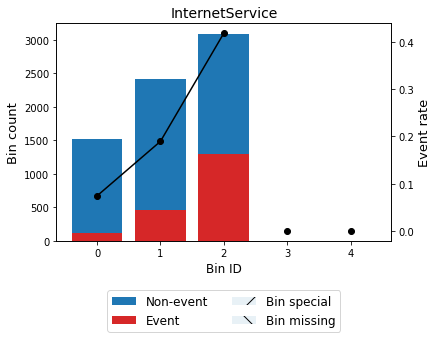

In [12]:
optb.binning_table.plot(metric="event_rate")

Now, we analyze variable "tenure" representing the number of months the customer has stayed with the company. We see a notorious descending trend indicating that the probability of churn decreases as the permanence of the contract increases.

In [13]:
optb = binning_process.get_binned_variable("tenure")
optb.binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 1.50)",624,0.088599,244,380,0.608974,-1.461246,0.228186,0.026229
1,"[1.50, 5.50)",747,0.106063,383,364,0.487282,-0.967361,0.116792,0.014055
2,"[5.50, 10.50)",599,0.085049,375,224,0.373957,-0.502963,0.023827,0.002947
3,"[10.50, 16.50)",580,0.082351,384,196,0.337931,-0.345715,0.010597,0.001318
4,"[16.50, 22.50)",481,0.068295,350,131,0.272349,-0.035507,0.000087,0.000011
5,"[22.50, 33.50)",808,0.114724,629,179,0.221535,0.238503,0.006152,0.000767
6,"[33.50, 43.50)",647,0.091864,512,135,0.208655,0.314807,0.008413,0.001047
7,"[43.50, 49.50)",384,0.054522,322,62,0.161458,0.629175,0.018285,0.002249
8,"[49.50, 59.50)",690,0.097970,591,99,0.143478,0.768454,0.047072,0.005743
9,"[59.50, 70.50)",951,0.135028,864,87,0.091483,1.277422,0.153853,0.018022


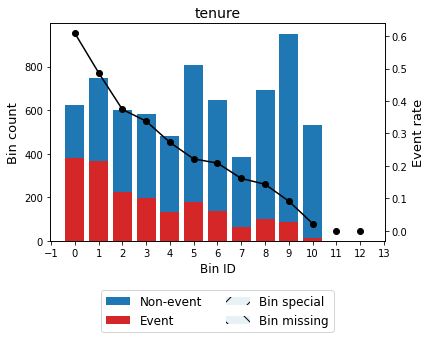

In [14]:
optb.binning_table.plot(metric="event_rate")

#### Transformation

Let's check the selected variables with the given selection criteria.

In [15]:
binning_process.get_support(names=True)

array(['InternetService', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges'], dtype='<U16')

Now we transform the original dataset to Weight of Evidence. Only the selected variables will be included in the transformed dataframe.

In [16]:
X_transform = binning_process.transform(X, metric="woe")

In [17]:
X_transform

,InternetService,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.434427,0.274938,-0.576292,-0.680487,-0.333624,-0.340675,-0.335507,-0.829097,0.202003,-1.158825
1,0.434427,-0.609808,0.218402,-0.680487,-0.333624,-0.340675,0.615628,0.424849,0.202003,0.201290
2,0.434427,0.274938,-0.576292,-0.680487,-0.333624,-0.340675,-0.335507,0.424849,0.202003,-0.579330
3,0.434427,-0.609808,0.218402,0.703371,-0.333624,-0.340675,0.615628,0.588090,0.202003,0.201290
4,-0.691066,-0.609808,-0.576292,-0.680487,-0.333624,-0.340675,-0.335507,-0.829097,-0.426972,-0.579330
...,...,...,...,...,...,...,...,...,...,...
7038,0.434427,-0.609808,0.218402,0.703371,-0.174285,-0.168154,-0.335507,0.424849,-0.426972,0.201290
7039,-0.691066,0.274938,0.218402,-0.680487,-0.174285,-0.168154,-0.335507,0.697418,-0.426972,1.068671
7040,0.434427,-0.609808,-0.576292,-0.680487,-0.333624,-0.340675,-0.335507,-0.829097,0.202003,-0.342795
7041,-0.691066,-0.609808,-0.576292,-0.680487,-0.333624,-0.340675,-0.335507,0.424849,-0.426972,-0.342795
